# EDA and Intro to Seaborn
If you want to type along with me, use [this notebook](https://humboldt.cloudbank.2i2c.cloud/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fbethanyj0%2Fdata271_sp24&branch=main&urlpath=tree%2Fdata271_sp24%2Fdemos%2Fdata271_demo20_live.ipynb) instead. 
If you don't want to type and want to follow along just by executing the cells, stay in this notebook. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 

## Seaborn basics

In [2]:
# Whenever we want to use seaborn for visualization
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
iris = sns.load_dataset('iris')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

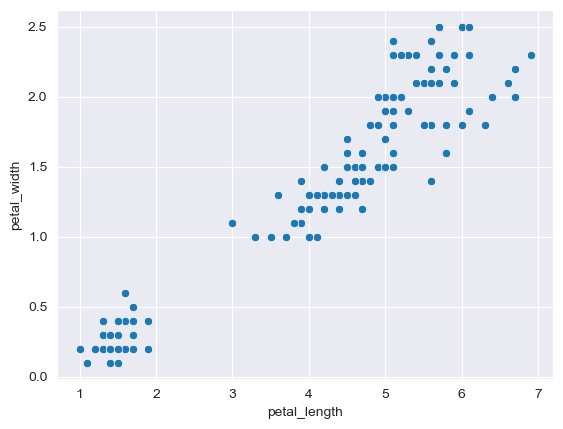

In [4]:
# To make a scatter plot
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width'); 

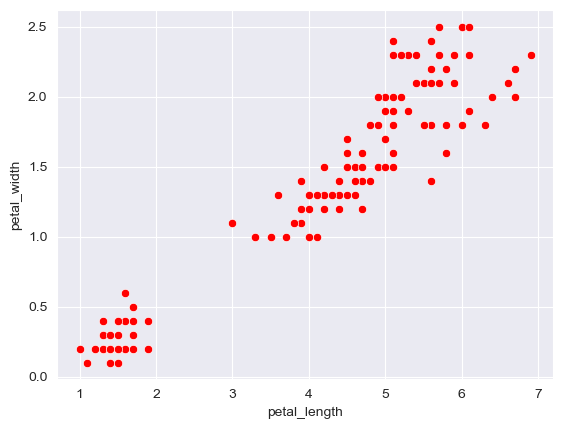

In [5]:
# Customizing your scatter plot: change the color of all the points to another color
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', color = 'r'); 

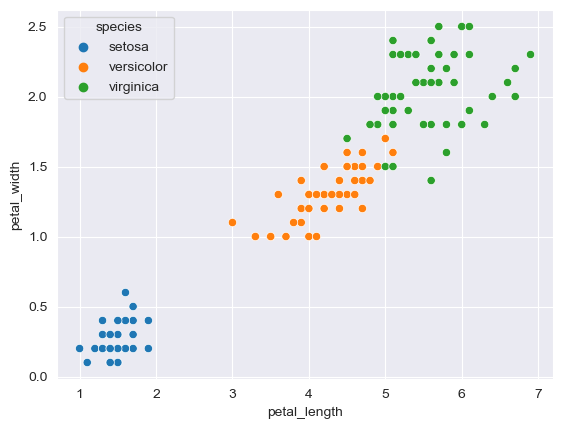

In [6]:
# Customizing your scatter plot: change the color of points to map to another variable (like an aesthetic map)
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species'); 

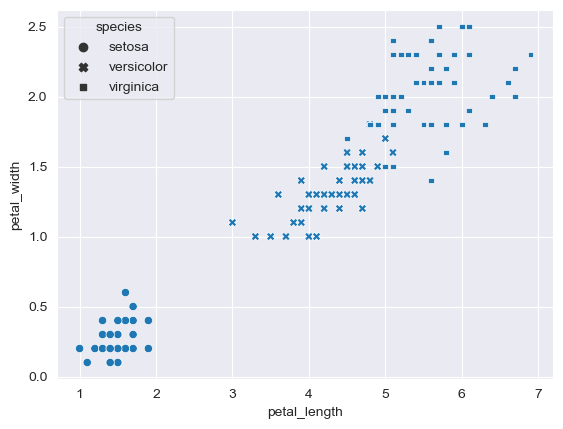

In [7]:
# Customizing your scatter plot: change the shape of points to map to another variable (like an aesthetic map)
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', style = 'species'); 

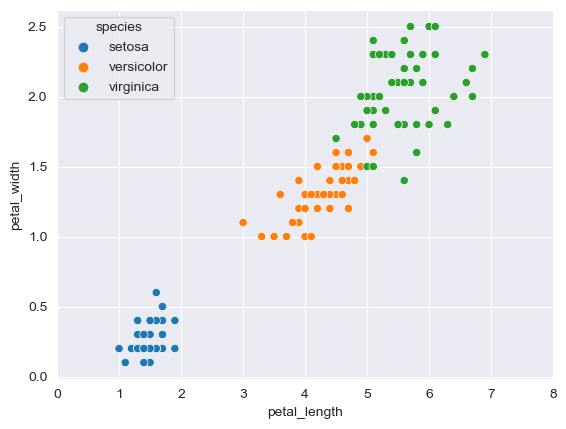

In [8]:
# adjusting axis scales
fig = sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')
fig.set_xlim(0,8);

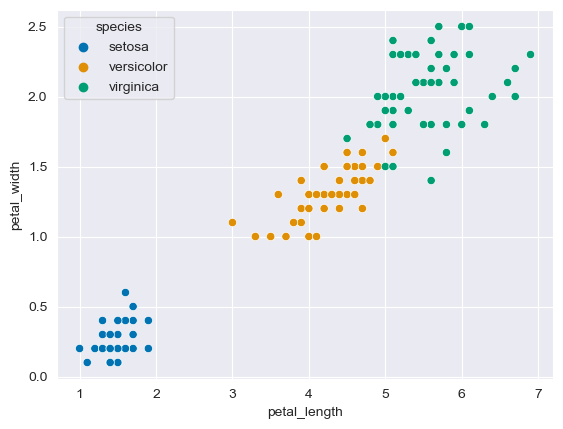

In [9]:
# adjusting color scales
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species', palette = 'colorblind');

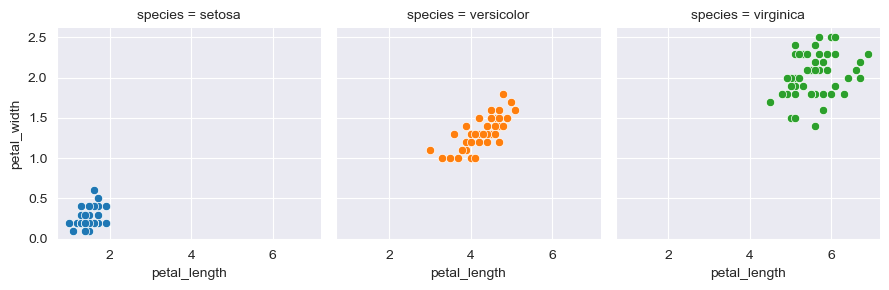

In [10]:
# Facetting
# Create a facet grid
fig = sns.FacetGrid(iris, col="species", hue = 'species')
# map your scatter plots to the grid
fig.map(sns.scatterplot, "petal_length", "petal_width");

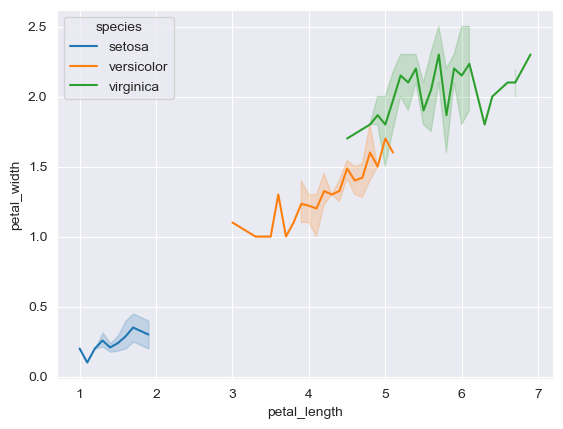

In [11]:
# line plots (NOTE: THIS IS NOT A CASE WHERE YOU SHOULD USE A LINE PLOT)
sns.lineplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species'); 

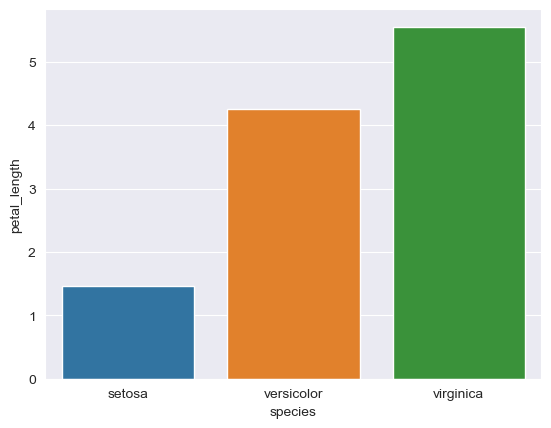

In [12]:
# barplots to look at averages of a numeric variable vs a categorical variable
sns.barplot(data = iris, x = 'species', y='petal_length', errorbar = None); 

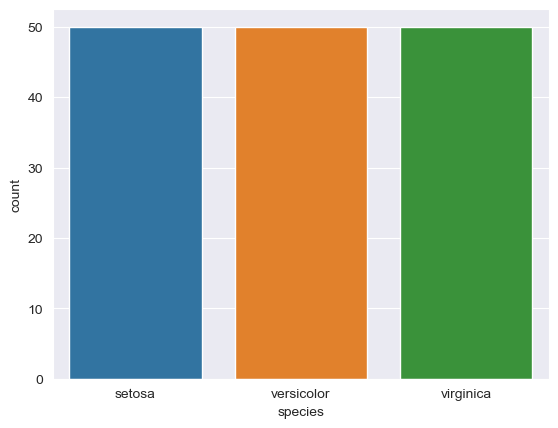

In [13]:
# barplots to just look at counts
sns.countplot(data = iris, x = 'species'); 

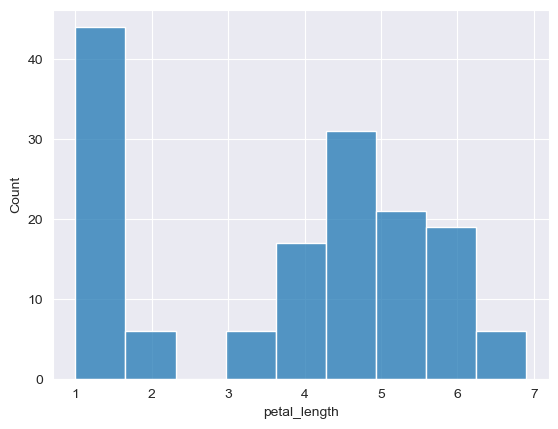

In [14]:
# Histograms
sns.histplot(data = iris, x = 'petal_length');

## Visualizations for EDA

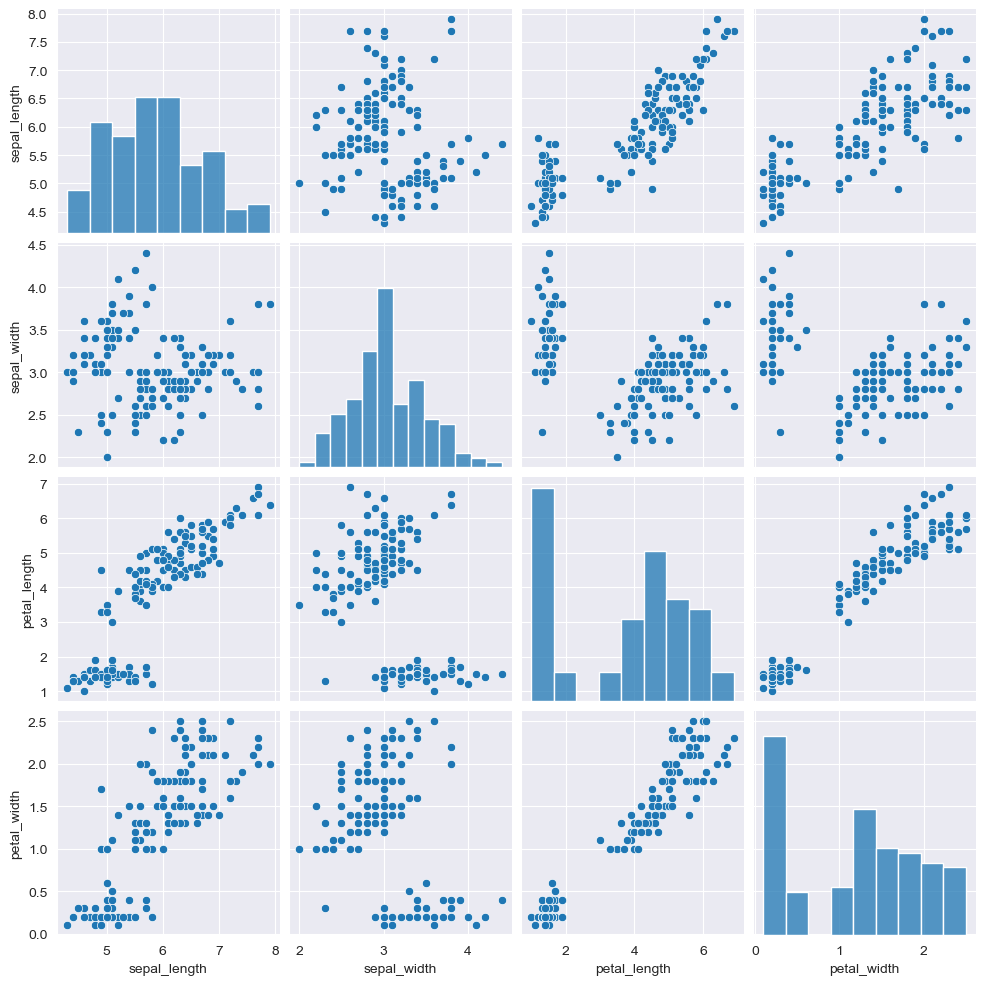

In [15]:
# Pairplots show the relationship between numeric variables
sns.pairplot(data = iris);

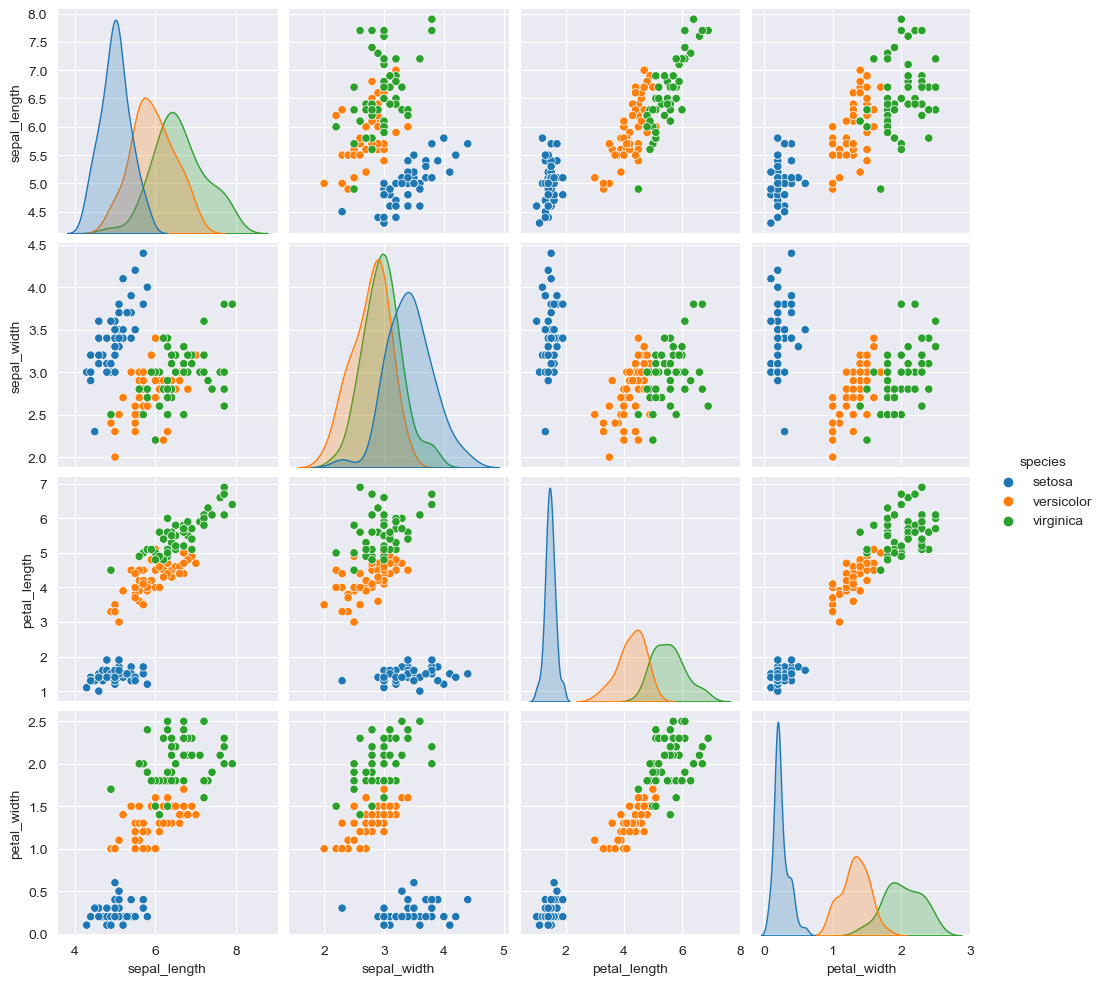

In [16]:
# Can map other variables to aesthetic properties
sns.pairplot(data = iris, hue='species');

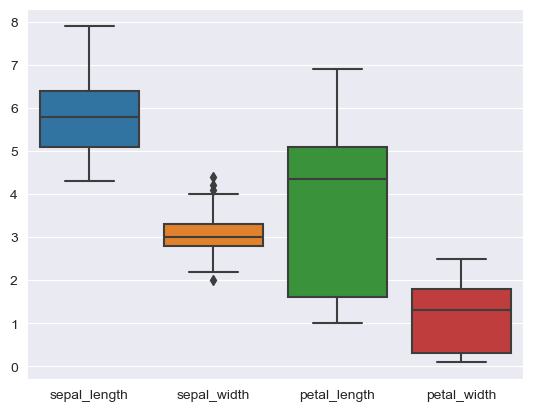

In [17]:
# boxplots can be used to look at he distribution of data in different categories
sns.boxplot(data = iris);

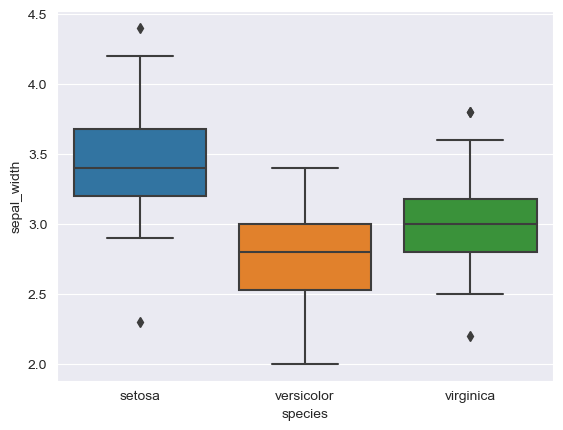

In [18]:
# boxplots can also be used with a categorical x and a numerical y
sns.boxplot(data = iris, x = 'species',y='sepal_width');

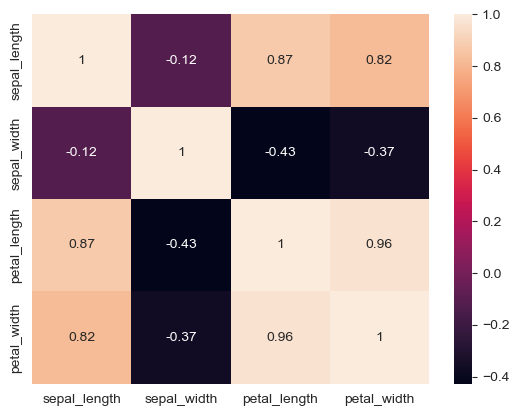

In [19]:
# heatmaps can be used to study correlations
corrmat = iris.corr() # make correlation matrix
sns.heatmap(data = corrmat, annot = True);

## Practice: Exploratory Data Analysis on Covid Data

In [20]:
# import covid data
covid = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Python-Data-Cleaning-Cookbook/master/Chapter05/data/covidtotals.csv')
covid.head()

iso_code    lastdate     location  total_cases  total_deaths  \
0      AFG  2020-07-12  Afghanistan      34451.0        1010.0   
1      ALB  2020-07-12      Albania       3371.0          89.0   
2      DZA  2020-07-12      Algeria      18712.0        1004.0   
3      AND  2020-07-12      Andorra        855.0          52.0   
4      AGO  2020-07-12       Angola        483.0          25.0   

   total_cases_pm  total_deaths_pm  population  pop_density  median_age  \
0         884.985           25.945  38928341.0       54.422        18.6   
1        1171.381           30.926   2877800.0      104.871        38.0   
2         426.717           22.896  43851043.0       17.348        29.1   
3       11065.812          673.008     77265.0      163.755         NaN   
4          14.696            0.761  32866268.0       23.890        16.8   

   gdp_per_capita  hosp_beds          region  
0        1803.987       0.50      South Asia  
1       11803.431       2.89  Eastern Europe  
2       13913.839       1.90    North Africa  
3             NaN        NaN  Western Europe  
4        5819.495        NaN  Central Africa

In [21]:
# begin exploring the dataset
covid_desc = covid.describe()
covid_desc

total_cases   total_deaths  total_cases_pm  total_deaths_pm  \
count  2.090000e+02     209.000000      209.000000       209.000000   
mean   6.075741e+04    2702.952153     2297.022144        73.636522   
std    2.724401e+05   11894.963052     4039.840203       156.341672   
min    3.000000e+00       0.000000        1.229000         0.000000   
25%    3.420000e+02       9.000000      202.834000         2.809000   
50%    2.820000e+03      53.000000      868.866000        15.216000   
75%    2.561100e+04     386.000000     2784.865000        58.374000   
max    3.247684e+06  134814.000000    35795.159000      1237.551000   

         population   pop_density  median_age  gdp_per_capita   hosp_beds  
count  2.090000e+02    198.000000  185.000000      182.000000  164.000000  
mean   3.708365e+07    328.162591   30.551351    19284.983786    3.012671  
std    1.428367e+08   1507.857139    9.097820    19687.706344    2.464917  
min    8.090000e+02      0.137000   15.100000      661.240000    0.100000  
25%    9.880020e+05     37.416000   22.200000     4485.329000    1.300000  
50%    6.871287e+06     87.250000   29.900000    13031.526500    2.358500  
75%    2.637828e+07    213.535500   38.700000    27882.133750    3.895750  
max    1.439324e+09  19347.500000   48.200000   116935.600000   13.800000

In [22]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iso_code         209 non-null    object 
 1   lastdate         209 non-null    object 
 2   location         209 non-null    object 
 3   total_cases      209 non-null    float64
 4   total_deaths     209 non-null    float64
 5   total_cases_pm   209 non-null    float64
 6   total_deaths_pm  209 non-null    float64
 7   population       209 non-null    float64
 8   pop_density      198 non-null    float64
 9   median_age       185 non-null    float64
 10  gdp_per_capita   182 non-null    float64
 11  hosp_beds        164 non-null    float64
 12  region           209 non-null    object 
dtypes: float64(9), object(4)
memory usage: 21.4+ KB


In [23]:
# Check for na values
covid.isna()

iso_code  lastdate  location  total_cases  total_deaths  total_cases_pm  \
0       False     False     False        False         False           False   
1       False     False     False        False         False           False   
2       False     False     False        False         False           False   
3       False     False     False        False         False           False   
4       False     False     False        False         False           False   
..        ...       ...       ...          ...           ...             ...   
204     False     False     False        False         False           False   
205     False     False     False        False         False           False   
206     False     False     False        False         False           False   
207     False     False     False        False         False           False   
208     False     False     False        False         False           False   

     total_deaths_pm  population  pop_density  median_age  gdp_per_capita  \
0              False       False        False       False           False   
1              False       False        False       False           False   
2              False       False        False       False           False   
3              False       False        False        True            True   
4              False       False        False       False           False   
..               ...         ...          ...         ...             ...   
204            False       False        False       False           False   
205            False       False         True       False            True   
206            False       False        False       False           False   
207            False       False        False       False           False   
208            False       False        False       False           False   

     hosp_beds  region  
0        False   False  
1        False   False  
2        False   False  
3         True   False  
4         True   False  
..         ...     ...  
204      False   False  
205       True   False  
206      False   False  
207      False   False  
208      False   False  

[209 rows x 13 columns]

In [24]:
# Summarize number of na's by column
nas = covid.isna().sum()
nas

iso_code            0
lastdate            0
location            0
total_cases         0
total_deaths        0
total_cases_pm      0
total_deaths_pm     0
population          0
pop_density        11
median_age         24
gdp_per_capita     27
hosp_beds          45
region              0
dtype: int64

In [25]:
# drop columns with na values
covid = covid.dropna(axis=1)
covid

iso_code    lastdate        location  total_cases  total_deaths  \
0        AFG  2020-07-12     Afghanistan      34451.0        1010.0   
1        ALB  2020-07-12         Albania       3371.0          89.0   
2        DZA  2020-07-12         Algeria      18712.0        1004.0   
3        AND  2020-07-12         Andorra        855.0          52.0   
4        AGO  2020-07-12          Angola        483.0          25.0   
..       ...         ...             ...          ...           ...   
204      VNM  2020-07-12         Vietnam        370.0           0.0   
205      ESH  2020-07-12  Western Sahara        519.0           1.0   
206      YEM  2020-07-12           Yemen       1389.0         365.0   
207      ZMB  2020-07-12          Zambia       1895.0          42.0   
208      ZWE  2020-07-12        Zimbabwe        982.0          18.0   

     total_cases_pm  total_deaths_pm  population           region  
0           884.985           25.945  38928341.0       South Asia  
1          1171.381           30.926   2877800.0   Eastern Europe  
2           426.717           22.896  43851043.0     North Africa  
3         11065.812          673.008     77265.0   Western Europe  
4            14.696            0.761  32866268.0   Central Africa  
..              ...              ...         ...              ...  
204           3.801            0.000  97338583.0        East Asia  
205         868.866            1.674    597330.0      West Africa  
206          46.570           12.238  29825968.0        West Asia  
207         103.079            2.285  18383956.0  Southern Africa  
208          66.070            1.211  14862927.0  Southern Africa  

[209 rows x 9 columns]

In [26]:
# check if there are any duplicate rows
covid.duplicated().sum()

0

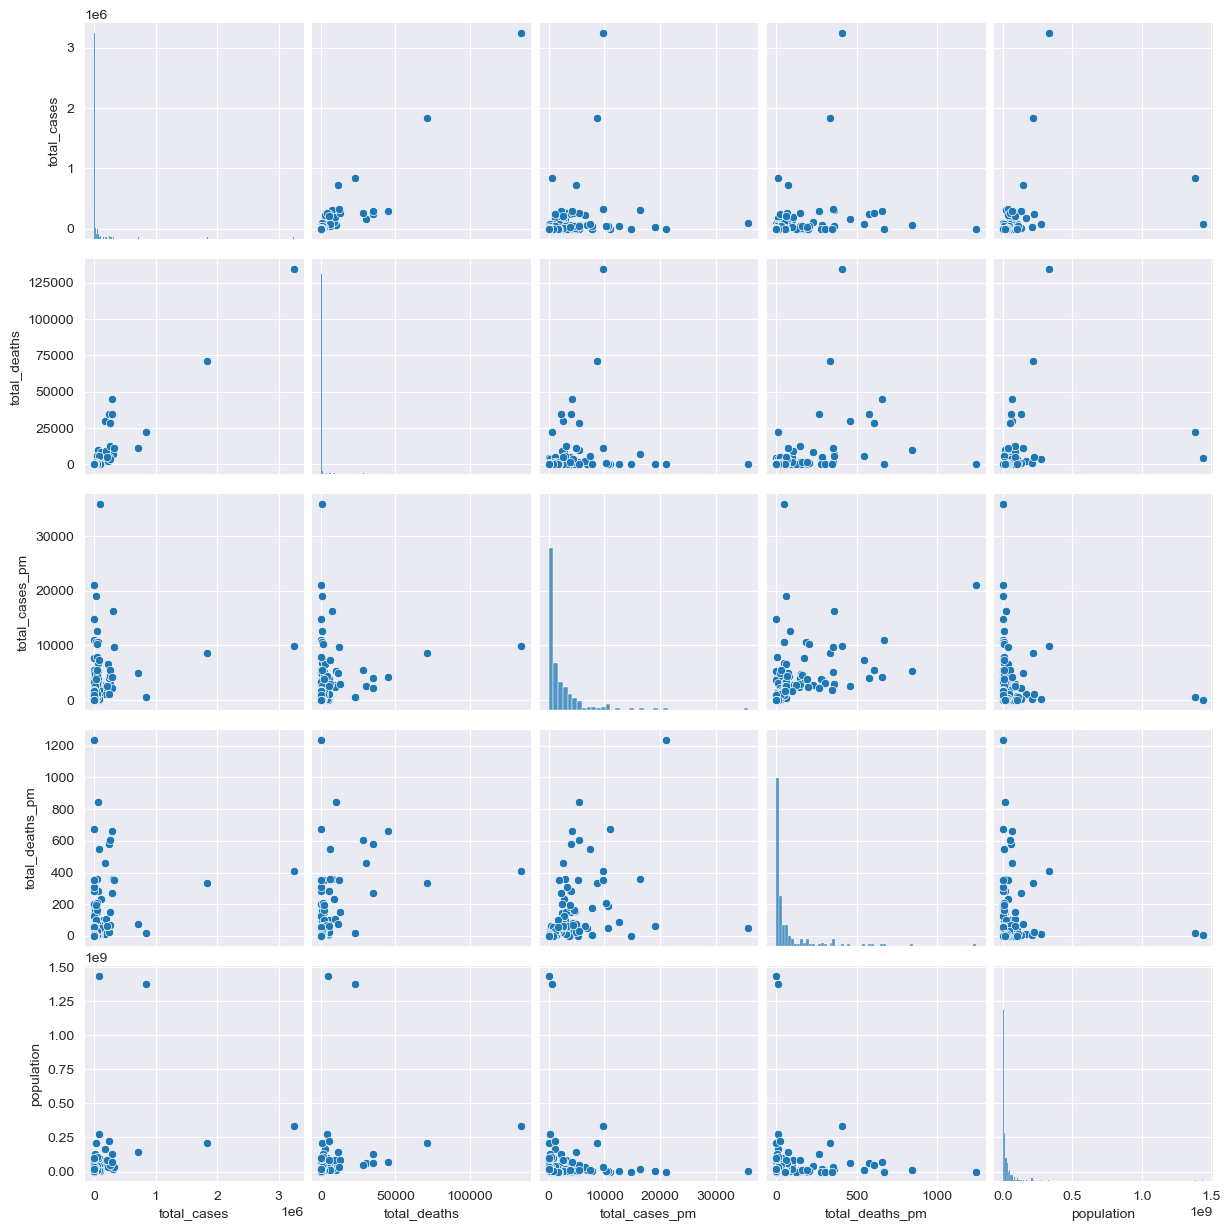

In [27]:
# begin visualizing for insights
sns.pairplot(data = covid);

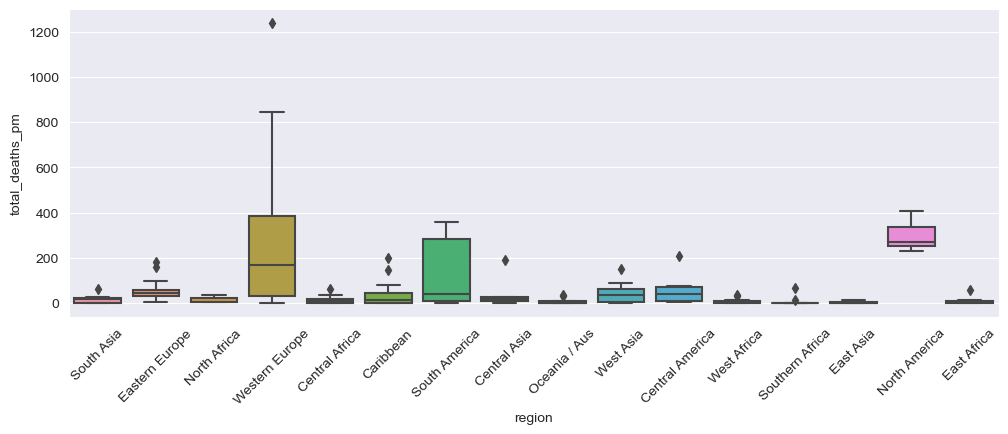

In [28]:
# boxplots to look at distributions
plt.figure(figsize=(12,4))
sns.boxplot(x = covid.region,y=covid.total_deaths_pm)
plt.xticks(rotation=45)
plt.show()

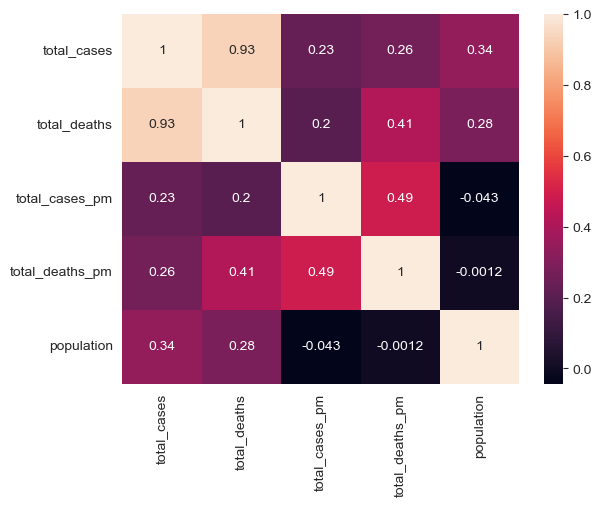

In [29]:
# heatmaps to look at correlations
corrmatc = covid.corr() # make correlation matrix
sns.heatmap(data = corrmatc, annot = True);

## Activity

1. What did the inital visualizations above reveal that was surprising or interesting? Create an additional Seaborn visualization to explore this. 